# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

The objective of this experiment is to understand Decision Tree classifier.

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 60 records. Each record represents the following details of fruits : 

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* Sphericity -  is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

*  Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Orange as 22
     - Greenish Yellow as 23
     - Green as 24
     - Red as 25
     - Reddish Yellow as 26

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




### Setup Steps

In [2]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_DT_Fruits_data" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing Required Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn.tree import export_graphviz
import os
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [6]:
# The below function is used to convert labels(apple, orange) into 0 and 1
def labels_converter(s):
  s = s.lower()
  if s == "orange":
    return 0
  if s == "apple":
    return 1
  return -1

In [7]:
#The below function is used to convert color features to numericals
def color_converter(s):
  s = s.lower()
  if s == 'green':
    return 20 
  if s == 'greenish yellow':
    return 40
  if s == 'orange':
    return 60
  if s == 'red':
    return 80
  if s == 'reddish yellow':
    return 100
  return -1

In [8]:
import pandas as pd
fruits_data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter,"Color":color_converter})

To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()

In [9]:
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


In [10]:
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,1
65,80,200,0.49,1
66,80,200,0.42,1
67,80,201,0.40,1
68,80,202,0.40,1


In [26]:
data = fruits_data[["Sphericity", "Weight","Color"]].values
#print(data)
labels = fruits_data[["labels"]].values

### Splitting the data into train and test sets 

In [12]:
# Training and testing set ratio is 67 : 33
X_train, X_test,y_train,y_test = train_test_split(data,labels, test_size=0.33,random_state=42)

In [13]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46, 3), (23, 3), (46, 1), (23, 1))

### Training a Decision Tree Classifier 

In [14]:
decision_tree = DecisionTreeClassifier()

# Training or fitting the model with the train data
decision_tree.fit(X_train,y_train)

# Testing the trained model
decision_tree.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [27]:
# Calculating the score
decision_tree.score(X_test,y_test)

0.8260869565217391

### Visualize the data to get more sense of data


Matplotlib has a number of built-in colormaps where cmap can be used if c is an array of floats, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)

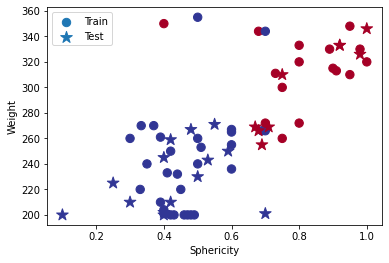

In [33]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.RdYlBu, s=70, label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, marker="*", s=150, label="Test")
plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(loc='upper left')
plt.show()

##Here you will see how the tree looks at each depth

In [38]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02
Depth = 4

Get minimum and maximum values of training data. Within the range of minimum and maximum values of training data (x_min, x_max, y_min, y_max), generate a meshgrid with a plot_step of 0.02 to repesent the region in the plot


For more details about np.meshgrid refer the following [link](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

In [39]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
XTrain, XTest = X_train[:, [0,1]], X_test[:,[0,1]]
yTrain, yTest = y_train, y_test

### Plot the graph for the decision tree classifier with depth

In [40]:
# Below is the function which generates a DOT file using graphviz and save the decision graph in .png file
def getDTViz(**kwargs):
    saveAs = "random_dt" + str(kwargs['Maxdepth']) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(kwargs['classifier'], out_file = save_dot, feature_names = kwargs['featuresNames'], class_names = kwargs['classNames'], filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    return save_png

* Performing decision Tree Classifier in the iterations with depth
* Predicting the above generated meshgrid points and displaying in the plot with countourf (Color filled area)

  - We use two features (xx and yy) as x and y axis to plot the decision boundary 
  - To predict and classify, we combine both the features (xx and yy) 
* In every iteration, generating a DOT file using graphviz to display and save the decision graph in .png file

Training Accuracy: 0.93 Testing Accuracy: 0.83  At Depth: 1


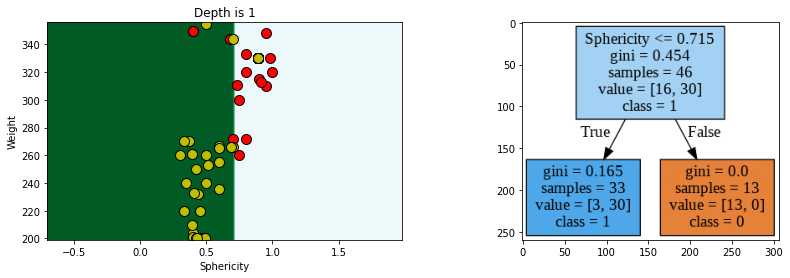

Training Accuracy: 0.96 Testing Accuracy: 0.83  At Depth: 2


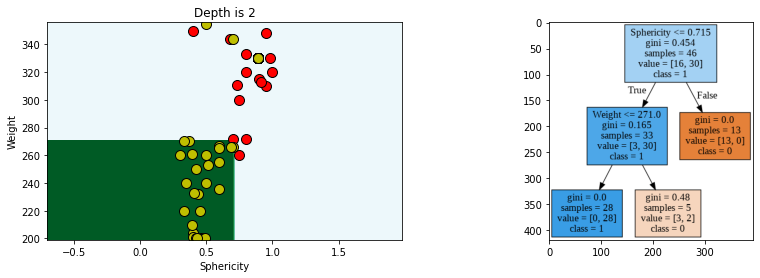

Training Accuracy: 0.98 Testing Accuracy: 0.83  At Depth: 3


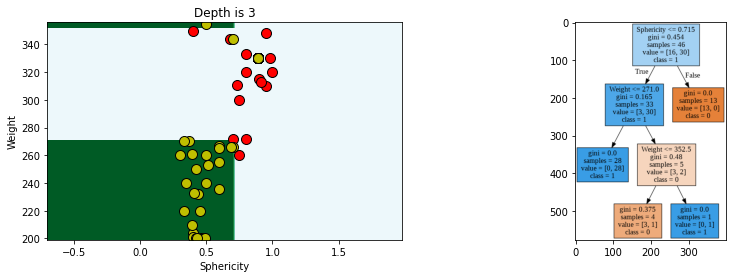

Training Accuracy: 0.98 Testing Accuracy: 0.83  At Depth: 4


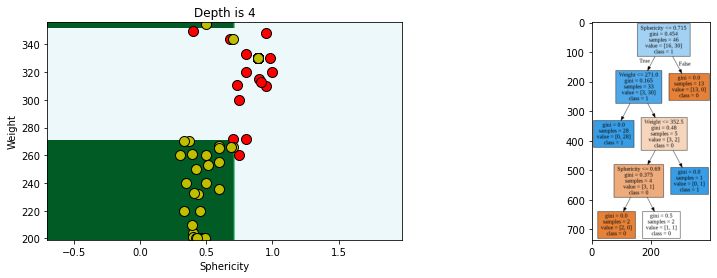

Training Accuracy: 1.0 Testing Accuracy: 0.83  At Depth: 5


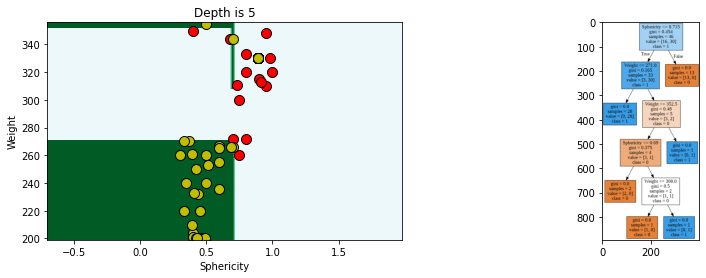

Training Accuracy: 1.0 Testing Accuracy: 0.83  At Depth: 6


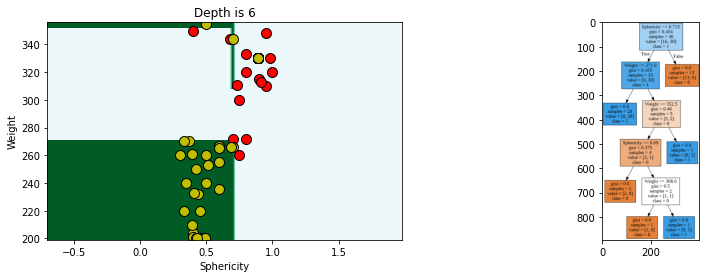

Training Accuracy: 1.0 Testing Accuracy: 0.83  At Depth: 7


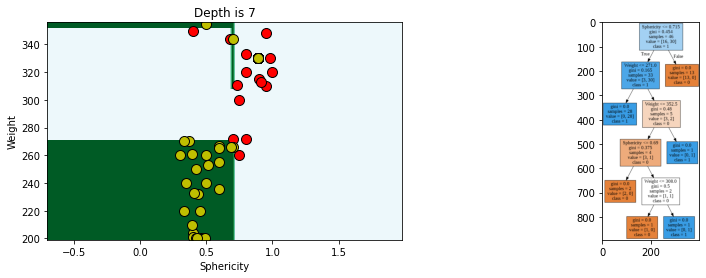

In [41]:
for depth in range(1,Depth):
    fig,ax =  plt.subplots(1,2,figsize=(14,4))
    ax[0].grid(False)
    # Perform Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth = depth,criterion='gini').fit(XTrain, yTrain)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(XTrain),yTrain),2)) + " " +
          "Testing Accuracy: " + str(round(accuracy_score(clf.predict(XTest),yTest),2)) + " " +
          " At Depth: " + str(depth))
    
    # Plot the decision boundary
    Z = clf.predict(np.c_[xx.reshape(-1,1), yy.reshape(-1,1)])   ## np.c_ is to concatenate the two arrays
    Z = Z.reshape(xx.shape)
    cs = ax[0].contourf(xx, yy, Z, cmap=plt.cm.BuGn)
    ax[0].set_title("Depth is" + " " + str(depth))
    ax[0].set_xlabel("Sphericity")
    ax[0].set_ylabel("Weight")
    
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yTrain == i)
        ax[0].scatter(XTrain[idx, 0], XTrain[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)        
        ax[0].grid(False)

    #  Call the getDTViz function for saving the decision graph in .png file and plot the same
    save_png = getDTViz(Maxdepth = depth, featuresNames = ["Sphericity","Weight"], classNames=['0', '1'], classifier = clf)
    ax[0].grid(False)
    ax[1].imshow(plt.imread(save_png))
    plt.show()

## Please answer the questions below to complete the experiment:

In [21]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [22]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Keep on the momentum " #@param {type:"string"}


In [23]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [24]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2518
Date of submission:  12 Sep 2020
Time of submission:  09:19:48
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
